# pure state & do not measure protection qbits

In [2]:
#import
from qiskit import *
from numpy import identity as eye, trace, kron
import numpy as np
import matplotlib.pyplot as plt
from qiskit.providers.aer import noise
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, \
    process_fidelity, random_state, projector
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_histogram
import glob
import PIL 

In [3]:
IBMQ.save_account('(INSERT USER IBMQ TOKEN HERE)', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

In [5]:
#Simulators
statevec = BasicAer.get_backend('statevector_simulator')
unitary = BasicAer.get_backend('unitary_simulator')
qasm = BasicAer.get_backend('qasm_simulator')

# Identity

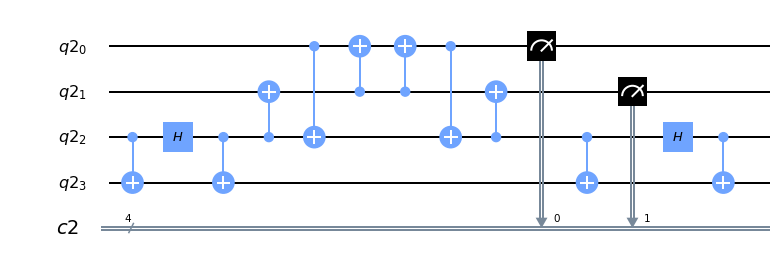

In [10]:
#Setup Quantum System
q4 = QuantumRegister(4)
c4 = ClassicalRegister(4)
qc4 = QuantumCircuit(q4, c4)

# encode
qc4.cx(q4[2],q4[3])
qc4.h(q4[2])
qc4.cx(q4[2],q4[3])
qc4.cx(q4[2], q4[1])
qc4.cx(q4[0], q4[2])
qc4.cx(q4[1], q4[0])

qc4.cx(q4[1], q4[0])
qc4.cx(q4[0], q4[2])
qc4.cx(q4[2], q4[1])
qc4.cx(q4[2],q4[3])
qc4.h(q4[2])
qc4.cx(q4[2],q4[3])

# Measure two cubits
qc4.measure(q4[0], c4[0])
qc4.measure(q4[1], c4[1])



qc4.draw()
qc4.draw(output="mpl")

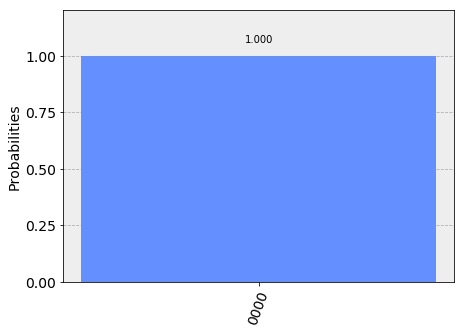

In [11]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc4, backend=simulator).result()
plot_histogram(result.get_counts(qc4))

In [12]:
#Run it on a real backend

num_qubits = 4

from qiskit.providers.ibmq import least_busy #Select the least busy device
from qiskit.tools.monitor import job_monitor
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_burlington


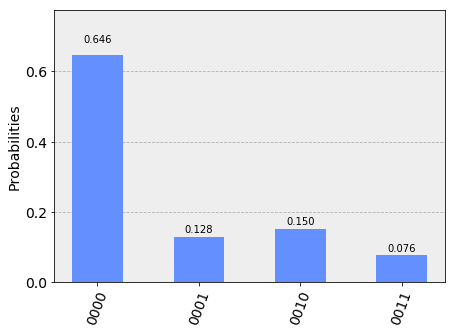

In [13]:
#device: ibmq_burlington
job2 = execute(qc4, backend=qcomp)
result2 = job2.result()
plot_histogram(result2.get_counts(qc4))

# X-error 

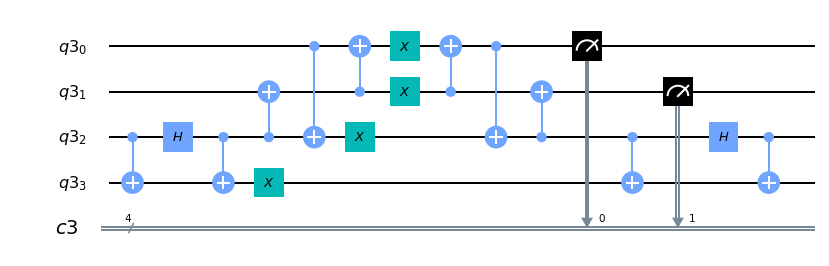

In [14]:
#Setup Quantum System
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

#I think that this is encoding everything using hadimar and control x gates

# encode
qc.cx(q[2],q[3])
qc.h(q[2])
qc.cx(q[2],q[3])
qc.cx(q[2], q[1])
qc.cx(q[0], q[2])
qc.cx(q[1], q[0])
qc.x(q)
qc.cx(q[1], q[0])
qc.cx(q[0], q[2])
qc.cx(q[2], q[1])
qc.cx(q[2],q[3])
qc.h(q[2])
qc.cx(q[2],q[3])

# Measure two cubits
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])


qc.draw()
qc.draw(output="mpl")

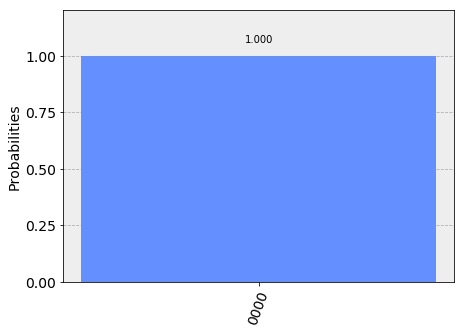

In [15]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

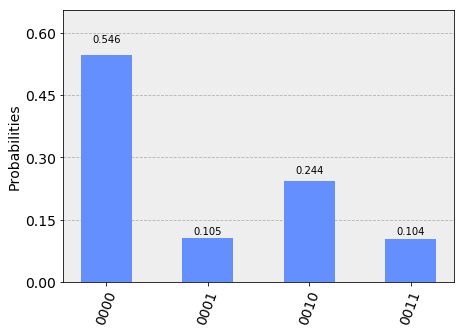

In [16]:
#device: ibmq_burlington
job4 = execute(qc, backend=qcomp)
result4 = job4.result()
plot_histogram(result4.get_counts(qc))

# Y-error

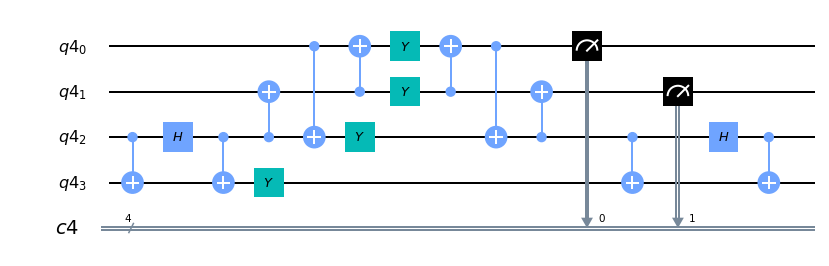

In [17]:
#Setup Quantum System
q3 = QuantumRegister(4)
c3 = ClassicalRegister(4)
qc3 = QuantumCircuit(q3, c3)

# encode
qc3.cx(q3[2],q3[3])
qc3.h(q3[2])
qc3.cx(q3[2],q3[3])
qc3.cx(q3[2], q3[1])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[1], q3[0])
qc3.y(q3)
qc3.cx(q3[1], q3[0])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[2], q3[1])
qc3.cx(q3[2],q3[3])
qc3.h(q3[2])
qc3.cx(q3[2],q3[3])

# Measure two cubits
qc3.measure(q3[0], c3[0])
qc3.measure(q3[1], c3[1])



qc3.draw()
qc3.draw(output="mpl")

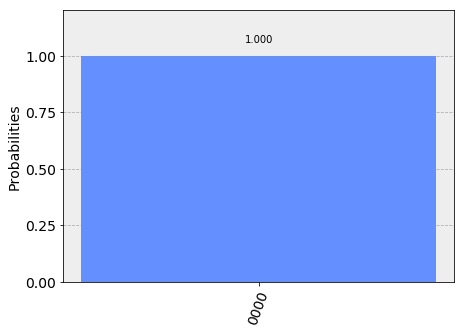

In [18]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3, backend=simulator).result()
plot_histogram(result.get_counts(qc3))

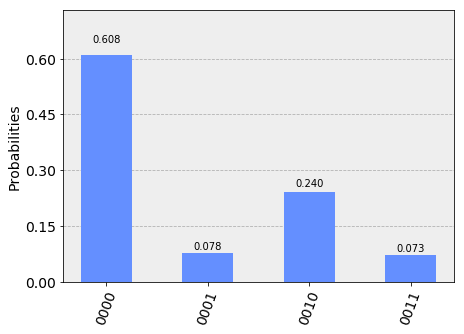

In [19]:
#device: ibmq_burlington
job5 = execute(qc3, backend=qcomp)
result5 = job5.result()
plot_histogram(result5.get_counts(qc3))

# Z-error

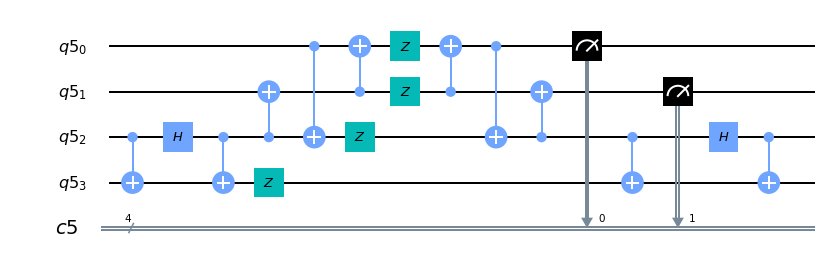

In [20]:
#Setup Quantum System
q5 = QuantumRegister(4)
c5 = ClassicalRegister(4)
qc5 = QuantumCircuit(q5, c5)

# encode
qc5.cx(q5[2],q5[3])
qc5.h(q5[2])
qc5.cx(q5[2],q5[3])
qc5.cx(q5[2], q5[1])
qc5.cx(q5[0], q5[2])
qc5.cx(q5[1], q5[0])
qc5.z(q5)
qc5.cx(q5[1], q5[0])
qc5.cx(q5[0], q5[2])
qc5.cx(q5[2], q5[1])
qc5.cx(q5[2],q5[3])
qc5.h(q5[2])
qc5.cx(q5[2],q5[3])

# Measure two cubits
qc5.measure(q5[0], c5[0])
qc5.measure(q5[1], c5[1])


qc5.draw()
qc5.draw(output="mpl")

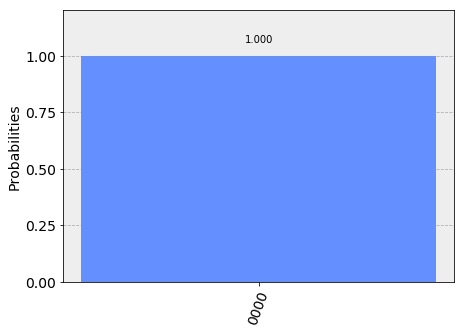

In [21]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc5, backend=simulator).result()
plot_histogram(result.get_counts(qc5))

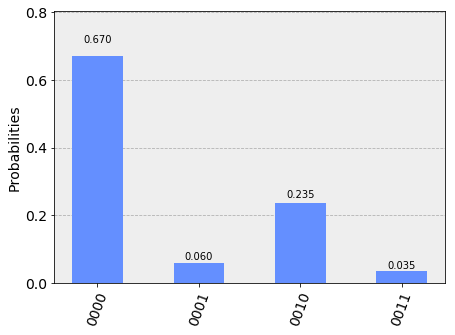

In [22]:
#device: ibmq_burlington
job6 = execute(qc5, backend=qcomp)
result6 = job6.result()
plot_histogram(result6.get_counts(qc5))